<a href="https://colab.research.google.com/github/abhi-11nav/Breast_Cancer-OD/blob/main/Breast_cancer_Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd

import tensorflow as tf 
from tensorflow import keras 

from keras.layers import Dense, Flatten, Conv2D, Input
from keras.models import Model, Sequential 

In [3]:
# Cloning the data repositorty

!git clone https://github.com/abhi-11nav/Breast_Cancer-OD.git

Cloning into 'Breast_Cancer-OD'...
remote: Enumerating objects: 1292, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 1292 (delta 48), reused 103 (delta 48), pack-reused 1189
Receiving objects: 100% (1292/1292), 156.24 MiB | 15.99 MiB/s, done.
Resolving deltas: 100% (633/633), done.
Checking out files: 100% (1283/1283), done.


In [4]:
!mkdir training

In [5]:
import shutil

In [6]:
# Moving data from git repository to training folder

shutil.move("/content/Breast_Cancer-OD/Test data", "/content/training")
shutil.move("/content/Breast_Cancer-OD/annot_data", "/content/training")

'/content/training/annot_data'

### Tensorflow object detection Setup

In [7]:
# Cloning the tensorflow object detection 2.0 repository 

!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 78574, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 78574 (delta 187), reused 310 (delta 154), pack-reused 78197
Receiving objects: 100% (78574/78574), 593.73 MiB | 33.45 MiB/s, done.
Resolving deltas: 100% (55793/55793), done.


Changing directories

In [8]:
pwd

'/content'

In [9]:
cd /content/models/research

/content/models/research


In [10]:
pwd

'/content/models/research'

Porotbuf Installtaion

In [11]:
!protoc object_detection/protos/*.proto --python_out=.

Coco API installation

In [12]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 14.26 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [13]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [14]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/numpy/core/include -I../common -I/usr/include/python3.7m -c ../common/maskApi.c -o build/temp.linux-x86_64-3.7

In [15]:
!cp -r pycocotools /content/models/research

In [16]:
cd /content/models/research

/content/models/research


Installing the object detection API

In [17]:
!cp object_detection/packages/tf2/setup.py .

In [18]:
!python -m pip install --use-feature=2020-resolver .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 11.0 MB 13.1 MB/s 
     |████████████████████████████████| 352 kB 66.6 MB/s 
     |████████████████████████████████| 2.2 MB 48.0 MB/s 
     |████████████████████████████████| 25.0 MB 1.2 MB/s 
     |████████████████████████████████| 67 kB 6.2 MB/s 
     |████████████████████████████████| 116 kB 75.6 MB/s 
     |████████████████████████████████| 38.2 MB 1.2 MB/s 
     |████████████████████████████████| 636 kB 66.0 MB/s 
     |

Testing the installation

In [19]:
!python object_detection/builders/model_builder_tf2_test.py

2022-11-09 02:15:03.285190: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 02:15:04.198152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-09 02:15:04.198310: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-09 02:15:04.198331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Creating a folder to store the files required for custom object detection

In [21]:
#shutil.move("/content/training", "/content/customOD")

shutil.move("/content/customOD/Testdata", "/content/data")
shutil.move("/content/customOD/annot_data", "/content/data")

'/content/data/annot_data'

In [22]:
shutil.move("/content/data", "/content/customOD")

'/content/customOD/data'

Importing a pre-trained model from tensorflow model zoo

In [25]:
cd /content/customOD/PreTrained_Models

/content/customOD/PreTrained_Models


In [26]:
# Downloading the zipfile

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

--2022-11-09 02:20:12--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.20.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 386640082 (369M) [application/x-tar]
Saving to: ‘ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’

ssd_resnet101_v1_fp 100%[===================>] 368.73M   166MB/s    in 2.2s    

2022-11-09 02:20:14 (166 MB/s) - ‘ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz’ saved [386640082/386640082]



In [27]:
!tar -xvf ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8.tar.gz

ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/checkpoint
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/pipeline.config
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/saved_model.pb
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/assets/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_resnet101_v1_fpn_1024x1024_coco17_tpu-8/saved_model/variables/variables.index


In [28]:
pwd

'/content/customOD/PreTrained_Models'

Converting .xml to .record 

In [29]:
cd /content/customOD

/content/customOD


In [31]:
# Create train data:
!python generate_tfrecord.py -x /content/customOD/data/annot_data -l /content/customOD/annotations/label_map.pbtxt -o /content/customOD/annotations/train.record

# Create test data:
!python generate_tfrecord.py -x /content/customOD/data/Testdata -l /content/customOD/annotations/label_map.pbtxt -o /content/customOD/annotations/test.record


2022-11-09 02:20:57.388470: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "generate_tfrecord.py", line 172, in <module>
    tf.app.run()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/platform/app.py", line 36, in run
    _run(main=main, argv=argv, flags_parser=_parse_flags_tolerate_undef)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 308, in run
    _run_main(main, args)
  File "/usr/local/lib/python3.7/dist-packages/absl/app.py", line 254, in _run_main
    sys.exit(main(argv))
  File "generate_tfrecord.py", line 162, in main
    tf_example = create_tf_example(group, path)
  File "generate_tfrecord.py", line 116, in create_tf_example
    encoded_jpg = fid.read()
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/lib/io/file_io.py", line 114, in read
    self._preread

Training the model

In [33]:
pwd

'/content/customOD'

In [37]:
!python model_main_tf2.py --model_dir=/content/customOD/Models/Resnet_model --pipeline_config_path=/content/customOD/Models/Resnet_model/pipeline.config

2022-11-09 02:31:12.944431: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 02:31:15.048294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-09 02:31:15.048913: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-09 02:31:15.048938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Exporting our trained model

In [38]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path /content/customOD/Models/Resnet_model/pipeline.config --trained_checkpoint_dir /content/customOD/Models/Resnet_model --output_directory /content/customOD/Exported_Models/my_model


2022-11-09 03:36:49.444538: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 03:36:50.332121: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-09 03:36:50.332268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-11-09 03:36:50.332296: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed p

Inferencing our model

Credits for the inferencing code : Krish naik https://www.youtube.com/user/krishnaik06

Loading model...Done! Took 24.195136070251465 seconds
Running inference for /content/customOD/data/annot_data/benign (103).png... Done


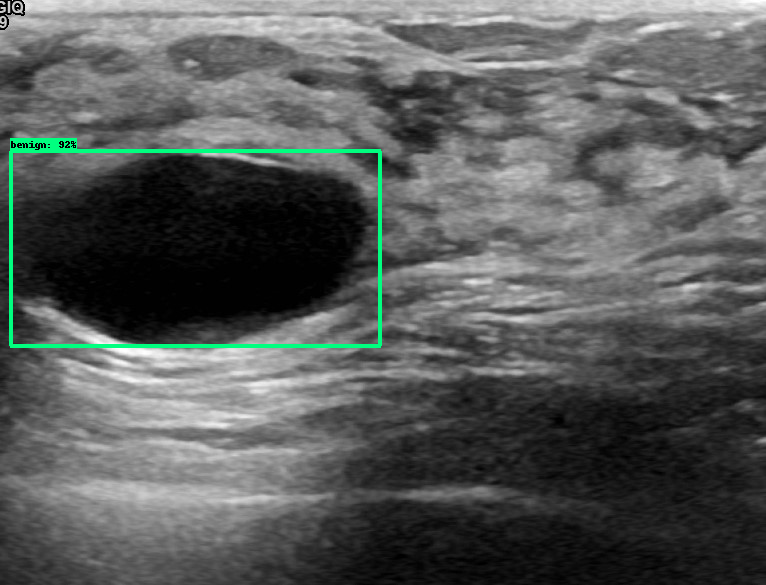

In [41]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/customOD/data/annot_data/benign (103).png'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/customOD/Exported_Models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/customOD/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


Downloading the file

In [42]:
!zip -r /content/file.zip /content/customOD

  adding: content/customOD/ (stored 0%)
  adding: content/customOD/exporter_main_v2.py (deflated 68%)
  adding: content/customOD/.ipynb_checkpoints/ (stored 0%)
  adding: content/customOD/annotations/ (stored 0%)
  adding: content/customOD/annotations/label_map.pbtxt (deflated 23%)
  adding: content/customOD/annotations/train.record (deflated 23%)
  adding: content/customOD/annotations/test.record (stored 0%)
  adding: content/customOD/export_tflite_graph_tf2.py (deflated 66%)
  adding: content/customOD/model_main_tf2.py (deflated 62%)
  adding: content/customOD/data/ (stored 0%)
  adding: content/customOD/data/Testdata/ (stored 0%)
  adding: content/customOD/data/Testdata/benign/ (stored 0%)
  adding: content/customOD/data/Testdata/benign/benign (415).xml (deflated 49%)
  adding: content/customOD/data/Testdata/benign/benign (425).png (deflated 23%)
  adding: content/customOD/data/Testdata/benign/benign (419).png (deflated 24%)
  adding: content/customOD/data/Testdata/benign/benign (40

THE END. 